<a href="https://colab.research.google.com/github/ShrutiChrist/Computer-Vision/blob/main/2348545_%5BCV%5DESE_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import cv2

##Median filter using Build-in And User-defined Function

In [27]:
# Read the input image
image = cv2.imread('/content/set-1-q1.tif', 0)  # Read as grayscale

# Median filtering using built-in function
median_filtered_image = cv2.medianBlur(image, 5)  # Kernel size of 5x5

# Median filtering using user-defined function
def custom_median(input_image, kernel_size):
   output_image = np.zeros(input_image.shape)
   border = kernel_size // 2
   padded_image = cv2.copyMakeBorder(input_image, border, border, border, border, cv2.BORDER_REFLECT)

   for i in range(border, input_image.shape[0] + border):
       for j in range(border, input_image.shape[1] + border):
           output_image[i - border, j - border] = np.median(padded_image[i - border: i + border + 1, j - border: j + border + 1].ravel())
   return output_image

custom_median_filtered_image = custom_median(image, 5)  # Kernel size of 5x5

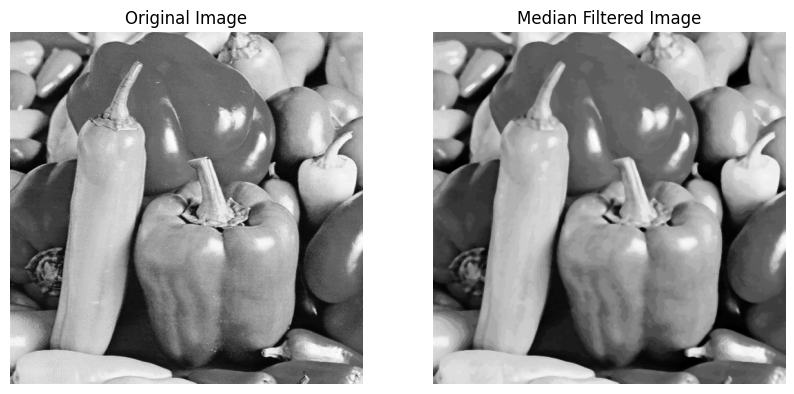

In [28]:
import matplotlib.pyplot as plt

# Median filtering using built-in function
median_filtered_image = cv2.medianBlur(image, 5)  # Kernel size of 5x5

# Display the original and median filtered images side by side
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Median filtered image
plt.subplot(1, 2, 2)
plt.imshow(median_filtered_image, cmap='gray')
plt.title('Median Filtered Image')
plt.axis('off')

plt.show()


**Inference**
1.  Inference for Median Filter:

*   The median filter is commonly used to remove impulsive noise such as salt-and-pepper noise from an image while preserving edges and fine details.
*   If the input image contained salt-and-pepper noise, the median filter likely helped in reducing the impact of the noise, resulting in a smoother and cleaner representation of the underlying image structure.
* Depending on the kernel size used for the median filter, smaller details and noise elements, such as isolated bright or dark pixels, could have been effectively mitigated.
  



##Min filter using Build-in And User-defined Function

In [29]:

# Min filtering using built-in function
min_filtered_image = cv2.erode(image, (5, 5))  # 5x5 kernel for erosion

# Min filtering using user-defined function
def custom_min_filter(input_image, kernel_size):
   output_image = np.zeros(input_image.shape)
   border = kernel_size // 2
   padded_image = cv2.copyMakeBorder(input_image, border, border, border, border, cv2.BORDER_CONSTANT, value=255)

   for i in range(border, input_image.shape[0] + border):
       for j in range(border, input_image.shape[1] + border):
           output_image[i - border, j - border] = np.min(padded_image[i - border: i + border + 1, j - border: j + border + 1])

   return output_image

custom_min_filtered_image = custom_min_filter(image, 5)  # 5x5 kernel for erosion



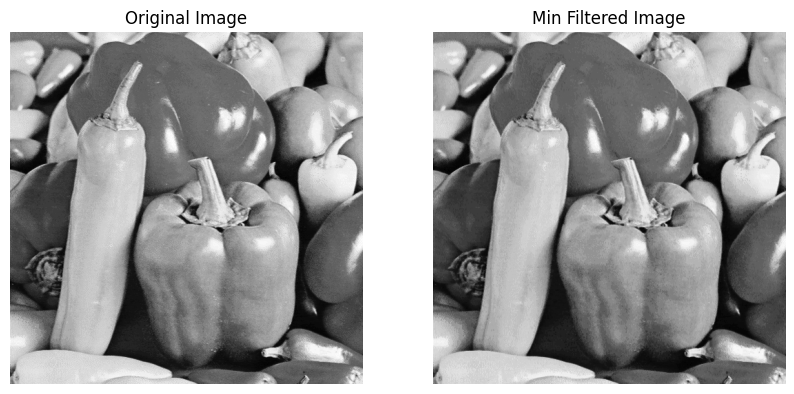

In [30]:
# Display the original and min filtered images side by side
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Min filtered image
plt.subplot(1, 2, 2)
plt.imshow(min_filtered_image, cmap='gray')
plt.title('Min Filtered Image')
plt.axis('off')

plt.show()

**Inference of Min-filter**
* Highlighting Darkest Points: The min filter makes the darkest parts of the image stand out more. It emphasizes the dark areas, making them more noticeable compared to the original image by selecting the darkest values in a specific window.

* Erosion of Light Regions: The min filter diminishes the brightness around dark areas. It reduces the brightness of the nearby light regions, creating a faded effect around dark spots in the image.

* Kernel Size Impact: The size of the filter window (5x5) affects how the filter works. A larger window can change how much detail is preserved and how much surrounding brightness is diminished. Adjusting the window size can alter the highlighting and fading effect in the filtered image.


**The min filter is useful for finding the darkest points in an image or for eroding light regions adjacent to dark areas due to its specific characteristics:**

* Dark Point Detection: The min filter replaces each pixel's value with the minimum value of the neighborhood pixels. This means that in an area containing dark points, the min filter will identify and retain the darkest pixel values, effectively highlighting the darkest points in the image. This feature makes it useful for detecting and emphasizing dark regions or points within an image.

* Erosion of Light Regions: When applied to an image, the min filter erodes the pixel values in light regions adjacent to dark areas. The filter reduces the intensity of the light regions bordering the dark areas, effectively causing erosion or reduction in the size of the lighter regions. This is beneficial for tasks such as segmenting objects or features based on their light and dark boundaries.



# 2. Detect the edges in the attached image with respect to the place where the second derivative of the intensity has zero crossing and use non-maximal suppression algorithm to find the optimum edge in the image.

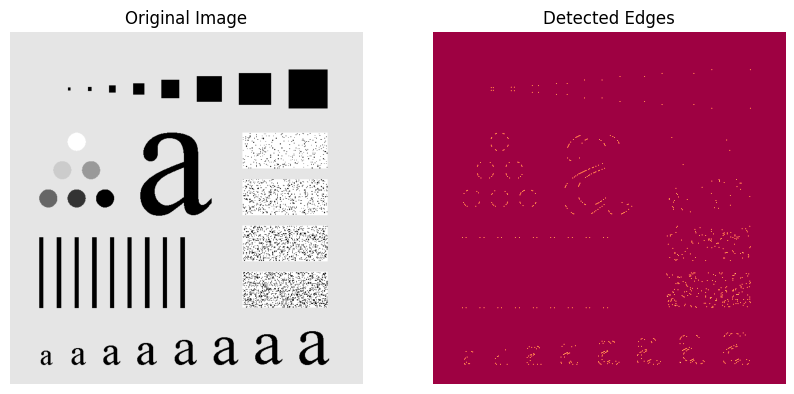

In [31]:

# Read the input image
image2 = cv2.imread('/content/set-1-q2.tif', 0)  # Read as grayscale

# Calculate the second derivative of the intensity
laplacian = cv2.Laplacian(image2, cv2.CV_64F, ksize=3)

# Find zero crossings
rows , cols = laplacian.shape
zero_crossings = np.zeros_like(laplacian, dtype=np.uint8)

for i in range(1, rows-1):
    for j in range(1, cols-1):
        if (laplacian[i-1, j] * laplacian[i+1, j] < 0) or (laplacian[i, j-1] * laplacian[i, j+1] < 0):
            zero_crossings[i, j] = 255

# Non-maximal suppression
edges = np.zeros_like(zero_crossings)
for i in range(1, rows-1):
    for j in range(1, cols-1):
        if zero_crossings[i, j] == 255:
            if (laplacian[i, j] > 0 and
                (laplacian[i, j] > laplacian[i-1, j]) and
                (laplacian[i, j] > laplacian[i+1, j]) and
                (laplacian[i, j] > laplacian[i, j-1]) and
                (laplacian[i, j] > laplacian[i, j+1])):
                edges[i, j] = 255

# Display the original image and the detected edges
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image2, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Detected edges
plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='Spectral')
plt.title('Detected Edges')
plt.axis('off')

plt.show()
